In [1]:
#Standard packages
import pandas as pd
import numpy as np
import matplotlib

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns
# Allow plots in Notebook
%matplotlib inline

In [9]:
# Import complaint data
dta = pd.read_csv("D:/Documents/Data/scra_complaint_data.csv",encoding="ISO-8859-1")
dta.head(5)

,product,text,company,tags,date_sent_to_company,complaint_id
0,Checking or savings account,a check was cashed and remained good until aft...,JPMORGAN CHASE CO.,Servicemember,7/10/2015,1462503
1,Checking or savings account,a criminal used a bank of america account to s...,BANK OF AMERICA NATIONAL ASSOCIATION,Servicemember,7/27/2016,2032733
2,Checking or savings account,a merchant submitted an ach 2 12 weeks after t...,JPMORGAN CHASE CO.,Servicemember,5/23/2016,1935716
3,Checking or savings account,a person deposited my check in suntrust bank i...,SUNTRUST BANKS INC.,Servicemember,3/23/2015,1296735
4,Checking or savings account,a stop payment was requested for funds being t...,E*TRADE BANK,Servicemember,2/9/2016,1774263


In [10]:
df = dta[['product', 'company', 'text']]
df.head(5)

,product,company,text
0,Checking or savings account,JPMORGAN CHASE CO.,a check was cashed and remained good until aft...
1,Checking or savings account,BANK OF AMERICA NATIONAL ASSOCIATION,a criminal used a bank of america account to s...
2,Checking or savings account,JPMORGAN CHASE CO.,a merchant submitted an ach 2 12 weeks after t...
3,Checking or savings account,SUNTRUST BANKS INC.,a person deposited my check in suntrust bank i...
4,Checking or savings account,E*TRADE BANK,a stop payment was requested for funds being t...


In [12]:
# Define dependent and independent vairables
df.rename(columns={'Consumer complaint narrative': 'text'}, inplace=True)
X = df['text']
y = df['product']
X,y

(0        a check was cashed and remained good until aft...
 1        a criminal used a bank of america account to s...
 2        a merchant submitted an ach 2 12 weeks after t...
 3        a person deposited my check in suntrust bank i...
 4        a stop payment was requested for funds being t...
                                ...                        
 20152    you closed my case why? as a veteran with proo...
 20153    you r group cfpb has been absolutely no help w...
 20154    you said that you need moor information on cas...
 20155    your submission [ case number ] how do i get t...
 20156    your support in this matter is appreciated in ...
 Name: text, Length: 20157, dtype: object, 0        Checking or savings account
 1        Checking or savings account
 2        Checking or savings account
 3        Checking or savings account
 4        Checking or savings account
                     ...             
 20152                       Mortgage
 20153                       Mor

In [13]:
# Get random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
# Inspect the dataset
X_train.head()

1847     on wells fargo withdrew 5500 00 from checking ...
6653     amount due is zero rental apartment lease was ...
17764    in i applied for mortgage refinancing under th...
16239    first of all we hav e us b ank for our mortgag...
5975     the payment system and deceptive billing pract...
Name: text, dtype: object

In [19]:
y_train.head()

1847     Checking or savings account
6653                 Debt collection
17764                       Mortgage
16239                       Mortgage
5975                     Credit card
Name: product, dtype: object

### Train and Test BOWs

In [20]:
# Build bag-of-words model
vectorizer = CountVectorizer()
bow_transformer_train=CountVectorizer().fit(X_train)
bow_transformer_test=CountVectorizer().fit(X_test)

bow_transformer=vectorizer.fit(X_train)
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
text_bow_test=bow_transformer.transform(X_test)#ONLY TEST DATA

### BOW Analysis with a Multi-Layer Perceptron (MLP) classifier 

In [21]:
#from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [23]:
# Perform BOW Analysis with a Multi-Layer Perceptron (MLP) classifier
# Grab some coffee - this may take a while

mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=35, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# Print training scores
mlp.fit(text_bow_train, y_train)
print("Training set score: %f" % mlp.score(text_bow_train, y_train))
print("Test set score: %f" % mlp.score(text_bow_test, y_test))

Iteration 1, loss = 1.73248790
Iteration 2, loss = 1.34779837
Iteration 3, loss = 1.34768904
Iteration 4, loss = 1.34754786
Iteration 5, loss = 1.34773869
Iteration 6, loss = 1.34778481
Iteration 7, loss = 1.34729563
Iteration 8, loss = 1.34765769
Iteration 9, loss = 1.34711303
Iteration 10, loss = 1.29524140
Iteration 11, loss = 1.34835785
Iteration 12, loss = 1.34711370
Iteration 13, loss = 1.34665313
Iteration 14, loss = 1.34628773
Iteration 15, loss = 1.34591992
Iteration 16, loss = 1.34570059
Iteration 17, loss = 1.34429887
Iteration 18, loss = 1.34267294
Iteration 19, loss = 1.28326913
Iteration 20, loss = 1.06119102
Iteration 21, loss = 1.07079467
Iteration 22, loss = 0.96748795
Iteration 23, loss = 0.96864277
Iteration 24, loss = 1.40758057
Iteration 25, loss = 1.35087982
Iteration 26, loss = 1.34935372
Iteration 27, loss = 1.34849173
Iteration 28, loss = 1.34837836
Iteration 29, loss = 1.34773320
Iteration 30, loss = 1.34770776
Iteration 31, loss = 1.34763745
Iteration 32, los

In [24]:
y_pred = mlp.predict(text_bow_test)
y_pred_score = mlp.score(text_bow_test,y_test)
y_pred_score

0.46048280423280424

In [25]:
# instantiating the model with Multinomial Naive Bayes..
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB()

# training the model...
mnb_clf = mnb_clf.fit(text_bow_train, y_train)
mnb_clf.score(text_bow_train, y_train)
print(mnb_clf.score(text_bow_train, y_train))

0.9036076263377986


In [26]:
y_pred = mnb_clf.predict(text_bow_test)
mnb_clf.score(text_bow_test, y_test)

0.859292328042328

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score
#mnb = MultinomialNB.fit(text_bow_train, y_train)
#y_pred = mnb.predict(text_bow_test)
#result = mnb.score(y_pred, y_test)
print("Accuracy: %.3f%%" % ((mnb_clf.score(text_bow_test, y_test))*100.0))
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

Accuracy: 85.929%
F1 Score:  0.7292542281214203
Precision Score:  0.8076726165965551
Recall Score:  0.7214796041458127


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    SGDClassifier(),
    RidgeClassifier(tol=1e-2, solver="sag"),
    Perceptron(max_iter=25),
    #KNeighborsClassifier(n_neighbors=10),
    LogisticRegression(random_state=0),
]

C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converg

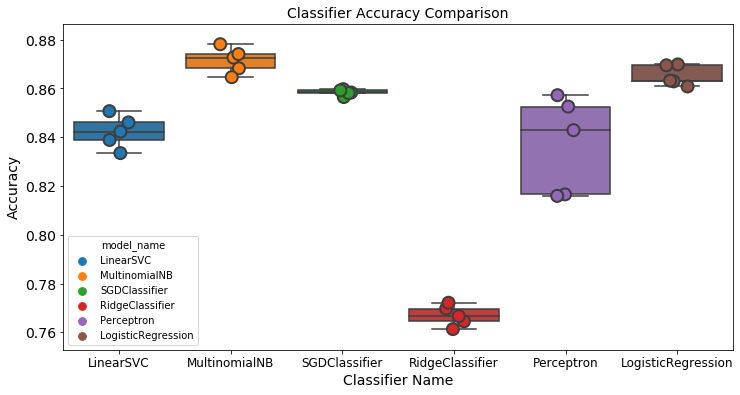

In [29]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, text_bow_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize=[12,6])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, hue='model_name',
              size=12, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Classifier Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Classifier Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

In [30]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.842302
LogisticRegression    0.865265
MultinomialNB         0.871572
Perceptron            0.837054
RidgeClassifier       0.766886
SGDClassifier         0.858388
Name: accuracy, dtype: float64

### Confusion Matrices

In [31]:
df

,product,company,text
0,Checking or savings account,JPMORGAN CHASE CO.,a check was cashed and remained good until aft...
1,Checking or savings account,BANK OF AMERICA NATIONAL ASSOCIATION,a criminal used a bank of america account to s...
2,Checking or savings account,JPMORGAN CHASE CO.,a merchant submitted an ach 2 12 weeks after t...
3,Checking or savings account,SUNTRUST BANKS INC.,a person deposited my check in suntrust bank i...
4,Checking or savings account,E*TRADE BANK,a stop payment was requested for funds being t...
...,...,...,...
20152,Mortgage,BANK OF AMERICA NATIONAL ASSOCIATION,you closed my case why? as a veteran with proo...
20153,Mortgage,WELLS FARGO COMPANY,you r group cfpb has been absolutely no help w...
20154,Mortgage,JPMORGAN CHASE CO.,you said that you need moor information on cas...
20155,Mortgage,NATIONSTAR MORTGAGE,your submission [ case number ] how do i get t...


In [33]:
corp = df
corp = corp[pd.notnull(corp['product'])]
corp.columns = ['product','company','text']
corp['category_id'] = corp['product'].factorize()[0]
category_id_corp = corp[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_corp.values)
id_to_category = dict(category_id_corp[['category_id', 'product']].values)
corp.head()

,product,company,text,category_id
0,Checking or savings account,JPMORGAN CHASE CO.,a check was cashed and remained good until aft...,0
1,Checking or savings account,BANK OF AMERICA NATIONAL ASSOCIATION,a criminal used a bank of america account to s...,0
2,Checking or savings account,JPMORGAN CHASE CO.,a merchant submitted an ach 2 12 weeks after t...,0
3,Checking or savings account,SUNTRUST BANKS INC.,a person deposited my check in suntrust bank i...,0
4,Checking or savings account,E*TRADE BANK,a stop payment was requested for funds being t...,0


In [35]:
#DO NOT CHANGE#
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(sublinear_tf=True, 
                       min_df=5, 
                       norm='l2', 
                       encoding='latin-1', 
                       ngram_range=(1, 3), 
                       stop_words='english',
                       lowercase=True,       
                       token_pattern=r'\b\w+\b',       
                       analyzer='word', 
                      )
features = tfidf.fit_transform(X_train) #CORRECT TRANSFORM
labels = y_train #CORRECT LABEL
X_train.shape[0], labels.shape[0]

(14109, 14109)

In [36]:
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for Product, category_id in sorted(id_to_category.items()):
    features_chi2 = chi2(features,labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(category_id))
    print(" . Most correlated unigrams:\n     . {}".format('\n     . '.join(unigrams[-N:])))
    print(" . Most correlated bigrams:\n     . {}".format('\n     . '.join(bigrams[-N:])))
    print(" . Most correlated trigrams:\n     . {}".format('\n     . '.join(trigrams[-N:])))

# 'Checking or savings account':
 . Most correlated unigrams:
     . bank
     . checking
     . overdraft
 . Most correlated bigrams:
     . savings account
     . debit card
     . checking account
 . Most correlated trigrams:
     . 00 checking account
     . account bank america
     . checking savings account
# 'Consumer Loan':
 . Most correlated unigrams:
     . dealership
     . car
     . vehicle
 . Most correlated bigrams:
     . main financial
     . vehicle loan
     . auto loan
 . Most correlated trigrams:
     . fargo dealer services
     . capital auto finance
     . big picture loans
# 'Credit card':
 . Most correlated unigrams:
     . limit
     . cards
     . card
 . Most correlated bigrams:
     . credit limit
     . american express
     . credit card
 . Most correlated trigrams:
     . 00 annual fee
     . credit card account
     . credit card company
# 'Debt collection':
 . Most correlated unigrams:
     . mortgage
     . collection
     . debt
 . Most correlated 

In [138]:
#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

#String
import string

In [139]:
# Defining a module for Text Processing
def text_process(tex):
    
# 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)

# 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '

# 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [140]:
vectorizer = CountVectorizer()
bow_transformer_train = CountVectorizer().fit(X_train)
bow_transformer_test = CountVectorizer().fit(X_test)

bow_transformer=vectorizer.fit(X_train)
text_bow_train=bow_transformer.transform(X_train) #ONLY TRAINING DATA
text_bow_test=bow_transformer.transform(X_test) #ONLY TEST DATA

In [141]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB

# instantiating the model with Multinomial Naive Bayes..
mnb_clf = MultinomialNB()

# training the model...
mnb_clf = mnb_clf.fit(text_bow_train, y_train)

In [1]:
features = ['Checking account','Consumer Loan','Credit card','Debt collection','Mortgage']

In [2]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib
from matplotlib import pyplot as plt
# Extract the features and name them target_names
#features = vectorizer.get_feature_names()
# Load the confusion matrix library and create a confusion matrix 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

NameError: name 'y_test' is not defined

In [ ]:
#svm_class = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
from sklearn import metrics
import seaborn as sns
%matplotlib inline
#mnb_clf.fit(text_bow_train, y_train)
y_pred = mnb_clf.predict(text_bow_test)
#features = []vectorizer.get_feature_names()
print(metrics.classification_report(y_test, y_pred, target_names=features))
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=features, yticklabels=features)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

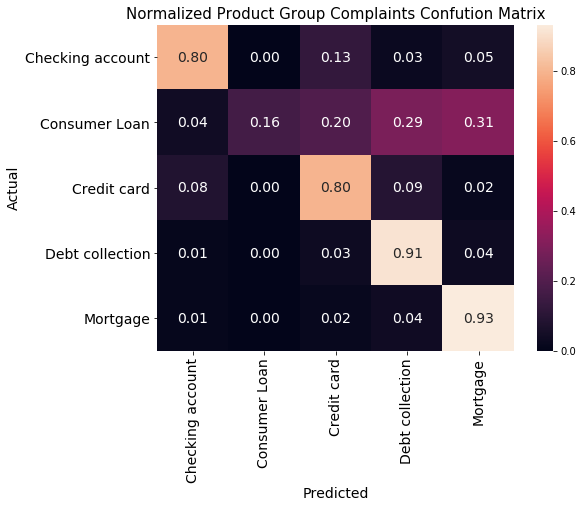

In [151]:
from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
cm_perc = conf_mat / (conf_sum.astype(float))
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(cm_perc, annot=True, annot_kws={"size": 14}, fmt='.2f',
            xticklabels=features, yticklabels=features)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Normalized Product Group Complaints Confution Matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()
%matplotlib inline

In [96]:
cm_perc

array([[7.97468354e-01, 0.00000000e+00, 1.26582278e-01, 2.84810127e-02,
        4.74683544e-02],
       [4.10958904e-02, 1.64383562e-01, 1.96347032e-01, 2.87671233e-01,
        3.10502283e-01],
       [8.05500982e-02, 2.94695481e-03, 8.00589391e-01, 9.43025540e-02,
        2.16110020e-02],
       [1.43626571e-02, 3.59066427e-03, 3.33931777e-02, 9.13105925e-01,
        3.55475763e-02],
       [1.14777618e-02, 7.17360115e-04, 1.86513630e-02, 3.73027260e-02,
        9.31850789e-01]])

In [104]:
from sklearn.metrics import f1_score, precision_score, recall_score
print("Accuracy: %.3f%%" % (result*100.0))
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 


Accuracy: 85.929%
F1 Score:  0.7292542281214203
Precision Score:  0.8076726165965551
Recall Score:  0.7214796041458127


### Classification Report (Precision, Recall and F1–Score)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                             precision    recall  f1-score   support

Checking or savings account       0.77      0.80      0.79       632
              Consumer Loan       0.72      0.16      0.27       219
                Credit card       0.77      0.80      0.79      1018
            Debt collection       0.92      0.91      0.92      2785
                   Mortgage       0.86      0.93      0.89      1394

                   accuracy                           0.86      6048
                  macro avg       0.81      0.72      0.73      6048
               weighted avg       0.86      0.86      0.85      6048



AttributeError: 'MultinomialNB' object has no attribute 'coefs_'

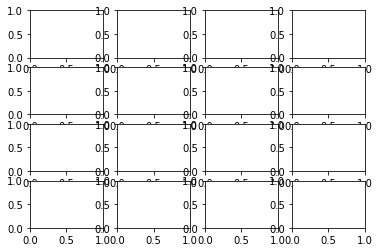

In [127]:
# Plot 
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mnb_clf.coefs_[0].min(), mnb_clf.coefs_[0].max()
for coef, ax in zip(mnb_clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(mnb_clf.coefs), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()